In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the neural network
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.1)

# Train the neural network
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(zip(X_train, y_train)):
        inputs, labels = data
        inputs = torch.Tensor(inputs)
        labels = torch.tensor([labels]).long()

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels.squeeze().long())  # convert labels to long here
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 10 == 9:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')

# Save the trained model
PATH = 'iris_net.pth'
torch.save(net.state_dict(), PATH)

# Evaluate the neural network on the test set
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(zip(X_test, y_test)):
        inputs, labels = data
        inputs = torch.Tensor(inputs)
        labels = torch.Tensor([labels]).long()

        # Predict the class label
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 0)
        total += 1
        if predicted == labels:
            correct += 1

print('Accuracy of the network on the test set: %d %%' % (
    100 * correct / total))



[1,    10] loss: 0.962
[1,    20] loss: 1.133
[1,    30] loss: 1.222
[1,    40] loss: 1.232
[1,    50] loss: 1.116
[1,    60] loss: 0.809
[1,    70] loss: 0.914
[1,    80] loss: 0.483
[1,    90] loss: 0.826
[1,   100] loss: 0.691
[1,   110] loss: 0.634
[1,   120] loss: 0.579
[2,    10] loss: 0.184
[2,    20] loss: 0.497
[2,    30] loss: 0.962
[2,    40] loss: 0.384
[2,    50] loss: 0.864
[2,    60] loss: 0.371
[2,    70] loss: 0.616
[2,    80] loss: 0.383
[2,    90] loss: 0.670
[2,   100] loss: 0.546
[2,   110] loss: 0.627
[2,   120] loss: 0.569
[3,    10] loss: 0.227
[3,    20] loss: 0.583
[3,    30] loss: 0.421
[3,    40] loss: 0.347
[3,    50] loss: 0.587
[3,    60] loss: 0.349
[3,    70] loss: 0.608
[3,    80] loss: 0.360
[3,    90] loss: 0.663
[3,   100] loss: 0.530
[3,   110] loss: 0.622
[3,   120] loss: 0.562
[4,    10] loss: 0.224
[4,    20] loss: 0.577
[4,    30] loss: 0.416
[4,    40] loss: 0.343
[4,    50] loss: 0.582
[4,    60] loss: 0.346
[4,    70] loss: 0.604
[4,    80] 

Sample feature data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Sample target data:
[0 0 0 0 0]


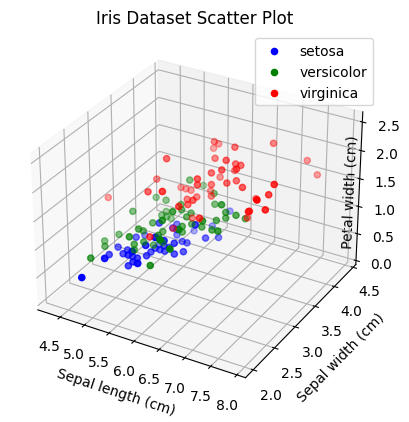

In [18]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

# Extract features (X) and target (y) data from the dataset
X = iris.data
y = iris.target

# Show the first five samples in the dataset
print("Sample feature data:")
print(X[:5])
print("Sample target data:")
print(y[:5])

# Output:
# Sample feature data:
# [[5.1 3.5 1.4 0.2]
#  [4.9 3.  1.4 0.2]
#  [4.7 3.2 1.3 0.2]
#  [4.6 3.1 1.5 0.2]
#  [5.  3.6 1.4 0.2]]
# Sample target data:
# [0 0 0 0 0]

# Define color codes for each class
colors = ['blue', 'green', 'red']

# Create a scatter plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(colors)):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 3], color=colors[i], label=iris.target_names[i])

# Add a legend to the plot
ax.legend()

# Set axis labels and plot title
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal width (cm)', labelpad=-25)
ax.set_title('Iris Dataset Scatter Plot')

# Display the plot
plt.show()



In [2]:
import torch
torch.cuda.is_available()



False